In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [7]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [8]:
data.shape

(5110, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


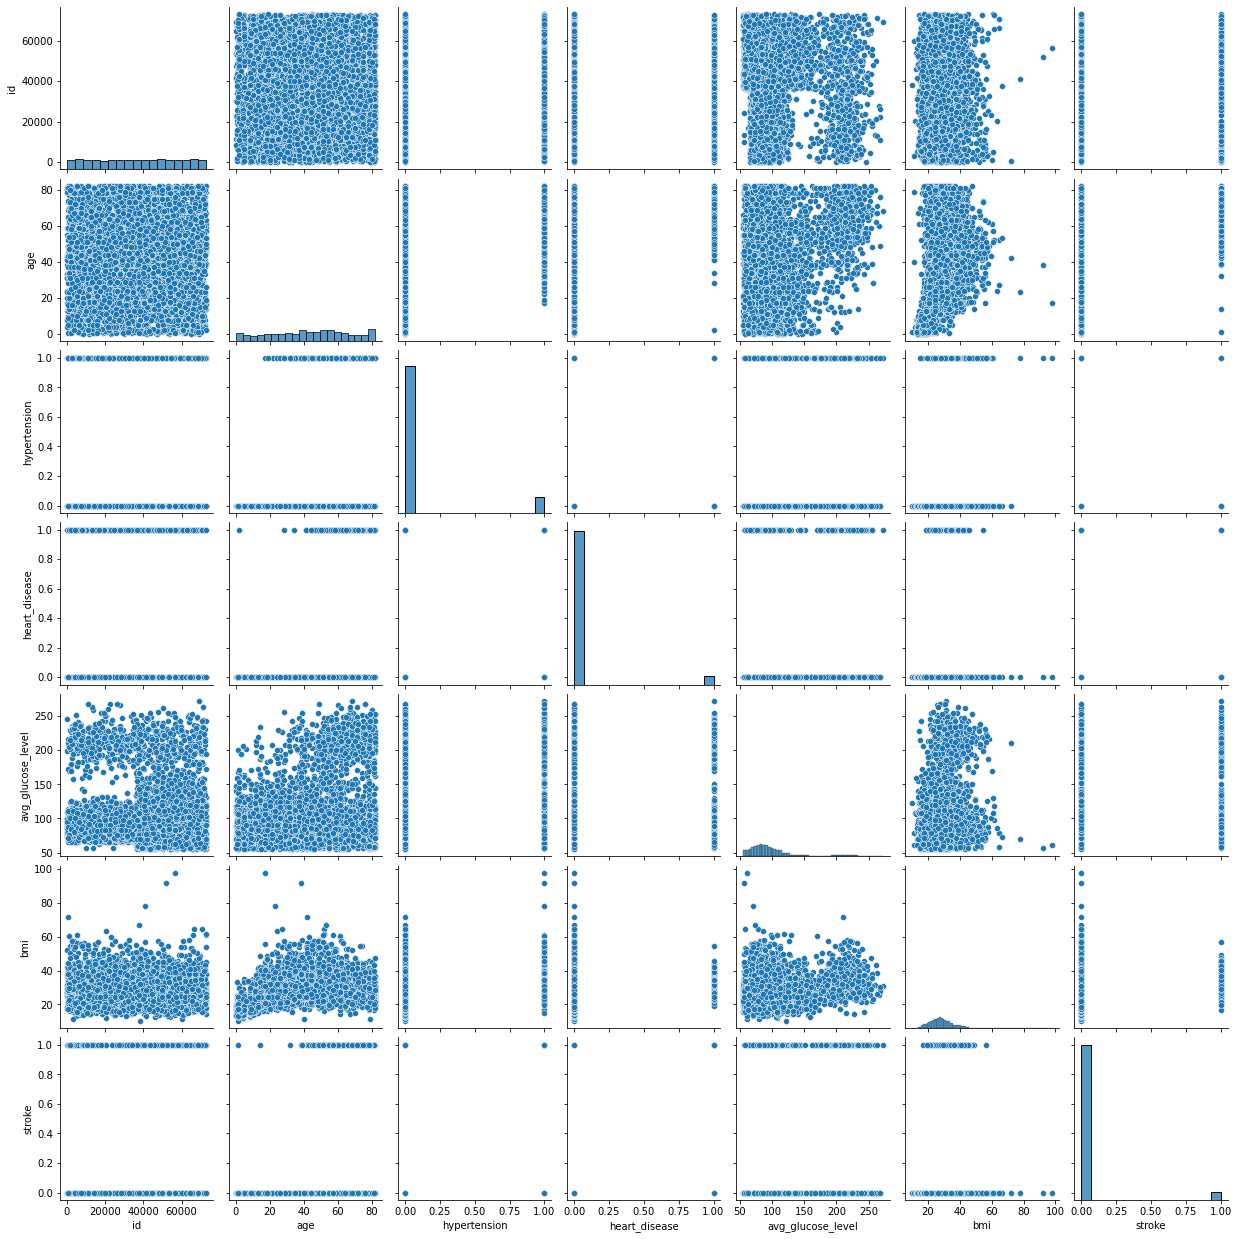

In [10]:
import seaborn as sns
sns.pairplot(data)

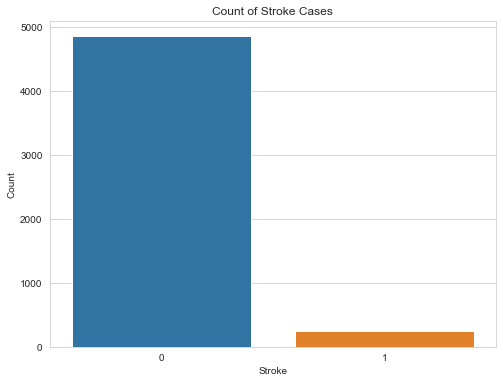

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="stroke", data=data)
plt.title("Count of Stroke Cases")
plt.xlabel("Stroke")
plt.ylabel("Count")
plt.show()

In [20]:
data.fillna(0,inplace=True)

In [22]:
data.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [23]:
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [24]:
data

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,0.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0.0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


In [26]:
X=data.drop('stroke',axis=1)

In [27]:
X

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,0.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,0.0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


In [28]:
y=data['stroke']

In [29]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [30]:
y.shape

(5110,)

In [32]:
X.shape

(5110, 22)

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
scaler=StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(X_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9383561643835616

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
 [[959   1]
 [ 62   0]]


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

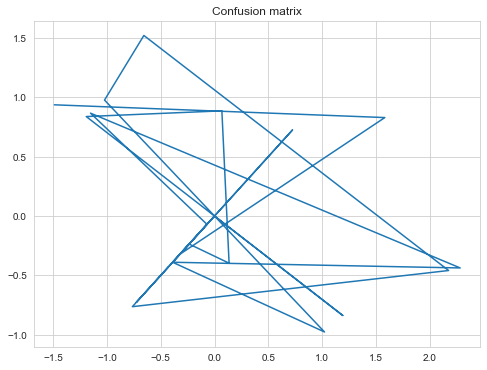

In [46]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.plot(X_train[0],X_train[1])
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

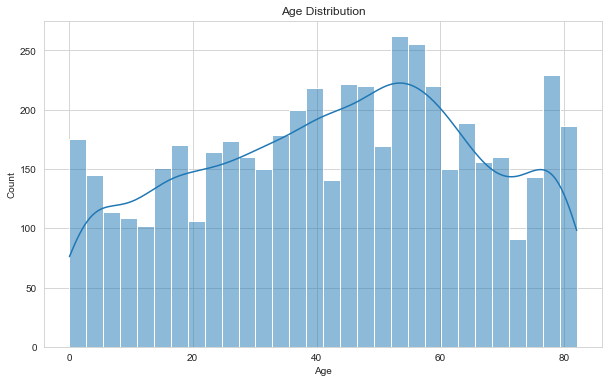

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x="age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

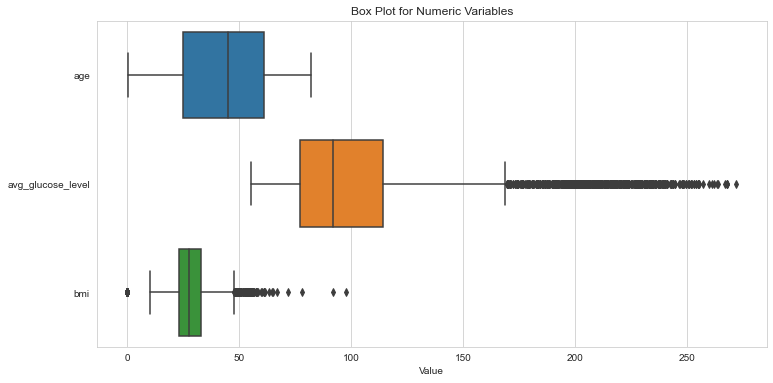

In [48]:
numeric_vars = ['age', 'avg_glucose_level', 'bmi']
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numeric_vars], orient="h")
plt.title("Box Plot for Numeric Variables")
plt.xlabel("Value")
plt.show()


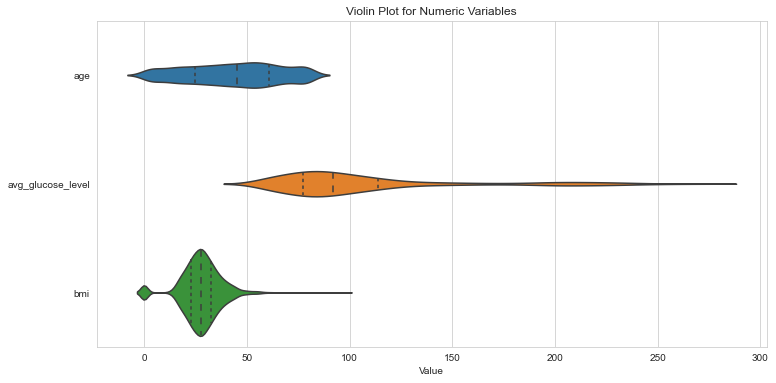

In [49]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data[numeric_vars], orient="h", inner="quartile")
plt.title("Violin Plot for Numeric Variables")
plt.xlabel("Value")
plt.show()

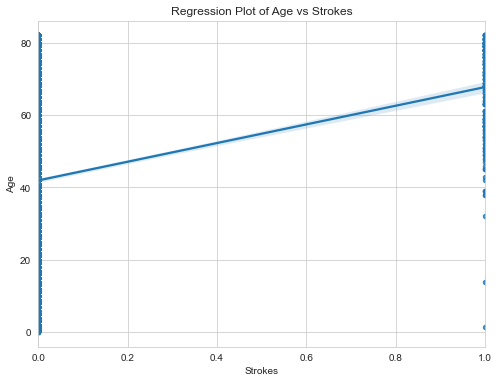

In [63]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x="stroke",y="age", scatter_kws={"s": 20})
plt.title("Regression Plot of Age vs Strokes")
plt.xlabel("Strokes")
plt.ylabel("Age")
plt.grid(True)
plt.show()

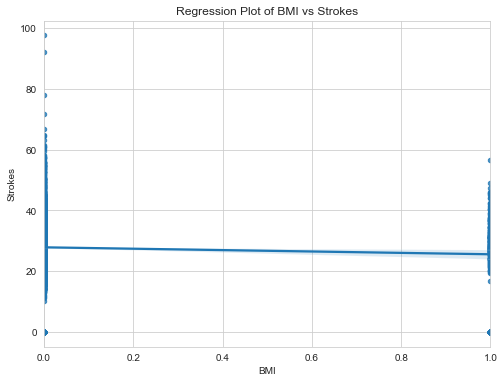

In [62]:
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x="stroke",y="bmi", scatter_kws={"s": 20})
plt.title("Regression Plot of BMI vs Strokes")
plt.xlabel("Strokes")
plt.ylabel("BMI")
plt.grid(True)
plt.show()